In [2]:
import scanpy as sc
import pandas as pd
import numpy as nu
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
from matplotlib import rcParams
import sys
sys.path.append("../src/bachclue")
import bachclue as bc
import time

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=200, facecolor='white')

## neurons 2000 dataset (mouse brain)
Info and reference: https://www.10xgenomics.com/resources/datasets/2-k-brain-cells-from-an-e-18-mouse-2-standard-2-1-0

In [7]:
adata = sc.read_h5ad("../../tests/datasets/neurons_2000/processed_data.h5ad")

Performing 14 parallel clusterings
Using 14/32 CPU cores
Starting parallel computation with Joblib using 14 cores...

Best resolution: 1.10


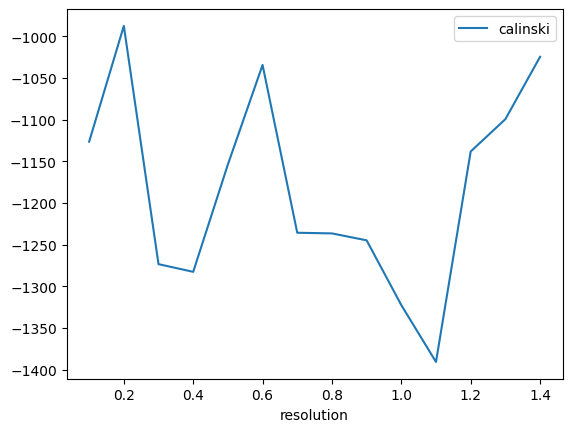

Execution time: 4.81 seconds


In [8]:
start_time = time.time()
a = bc.clustering_score(adata, score_value = 'calinski', min_res=0.1,max_res=1.5,step=0.1, plot=True, dim_reduction = 'umap')
end_time = time.time()

print(f"Execution time: {end_time - start_time:.2f} seconds")

Performing 14 parallel clusterings
Using 14/32 CPU cores
Starting parallel computation with Joblib using 14 cores...

Best resolution: 0.30


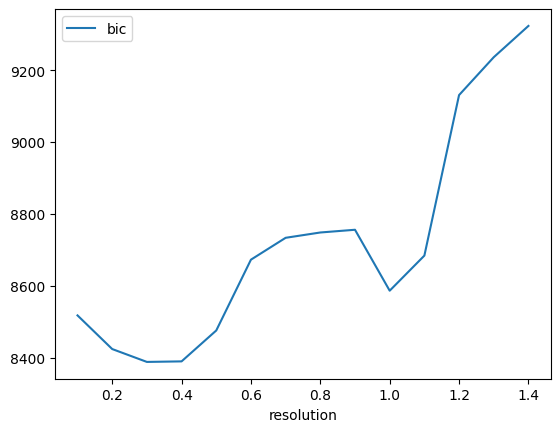

Execution time: 1.57 seconds


In [10]:
start_time = time.time()
a = bc.clustering_score(adata, score_value = 'bic', min_res=0.1,max_res=1.5,step=0.1, plot=True, dim_reduction = 'umap')
end_time = time.time()

print(f"Execution time: {end_time - start_time:.2f} seconds")

/opt/conda/envs/spatialdata/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


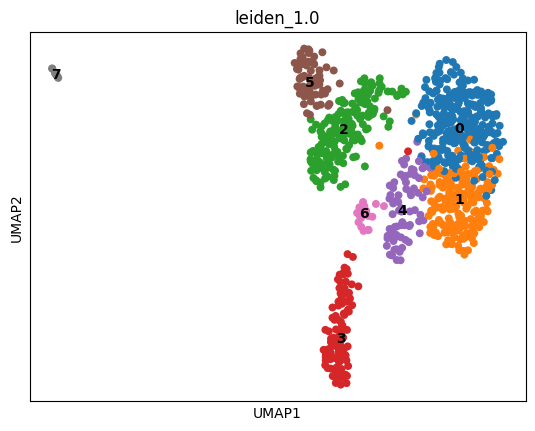

/opt/conda/envs/spatialdata/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


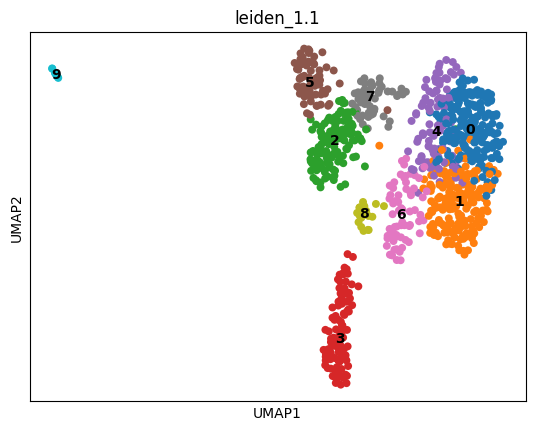

In [4]:
for res in [1.0,1.1]:
    sc.tl.leiden(adata, key_added="leiden_%s" %res, resolution=res)
    sc.pl.umap(adata, color="leiden_%s" %res,legend_loc="on data")

https://academic.oup.com/bioinformatics/article/35/17/3038/5289328

This dataset contains 2022 cells of a combined cortex, hippocampus and sub ventricular zone of an E18 mouse. Pre-analysis clustered the cells into 8 sub-groups of different types of neurons. 

The same number of clusters is found using our algorithm's best resolution (1.1)


----

From 10X Genomics' cloupe file there are 9 clusters
